### Comparison with other pruning methods

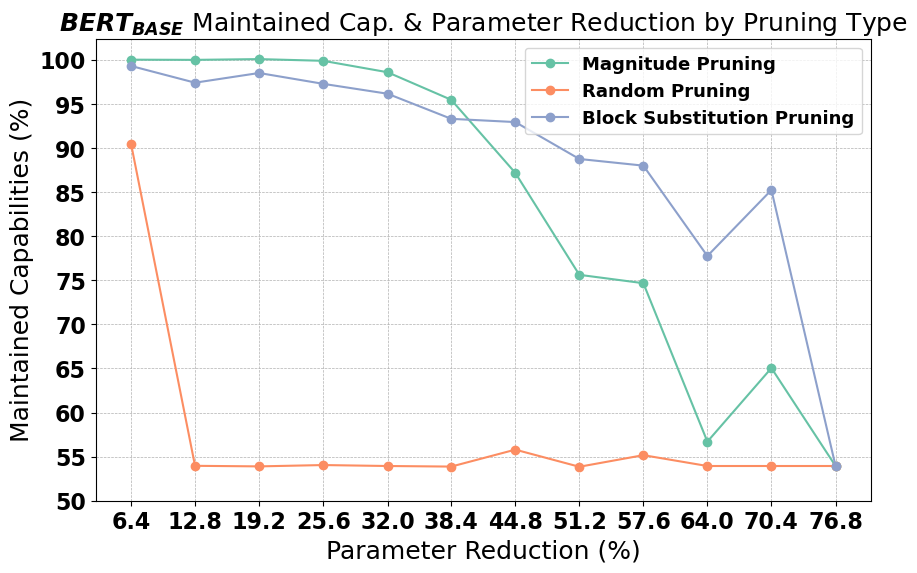

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16, 'font.weight': 'bold'})  # Adjusts the base default font size

pruning_data = {
    "Sparsity Level": [0.0593, 0.1186, 0.1779, 0.2373, 0.2969, 0.3559, 0.4152, 0.4745, 0.5338, 0.5931, 0.6524, 0.7118],
    "Magnitude": [0.9272, 0.9270, 0.9278, 0.9260, 0.9140, 0.8850, 0.8082, 0.7010, 0.6922, 0.5256, 0.6030, 0.5000],
    "Random": [0.8390, 0.5002, 0.4996, 0.5010, 0.5000, 0.4994, 0.5172, 0.4992, 0.5114, 0.5000, 0.5000, 0.5000],
    "Block Substitution": [0.9206, 0.9030, 0.9132, 0.9018, 0.8914, 0.8650, 0.8616, 0.8228, 0.8158, 0.7208, 0.7902, 0.5000]
}

# For every list value in pruning_data, divide by 92.70
for key in pruning_data:
    pruning_data[key] = [x / 0.927 for x in pruning_data[key]]

# Convert to DataFrame
df_pruning = pd.DataFrame(pruning_data)
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Plotting the data
plt.figure(figsize=(10, 6))
for pruning_type in ["Magnitude", "Random", "Block Substitution"]:
    plt.plot(df_pruning['Sparsity Level']*100, df_pruning[pruning_type]*100, label=f'{pruning_type} Pruning', marker='o', color=colors.pop(0))

# Set the x-axis ticks
sparsity_ticks = df_pruning['Sparsity Level']*100
plt.xticks(sparsity_ticks, labels=[f"{x:.1f}" for x in sparsity_ticks])

# Font size settings
plt.rcParams.update({'font.size': 14})  # Adjusts the base default font size
plt.title('$BERT_{BASE}$ Maintained Cap. & Parameter Reduction by Pruning Type', fontsize=18)
plt.xlabel('Parameter Reduction (%)', fontsize=18)  # Increased fontsize for x-label
plt.ylabel('Maintained Capabilities (%)', fontsize=18)
# Add legend explaining that the numbers are blocks
plt.yticks(range(50, 101, 5))
plt.legend(fontsize=13)  # Increased fontsize for legend
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Show the plot
plt.savefig('figures/pruning_acc_perf_comparison.png', bbox_inches='tight')


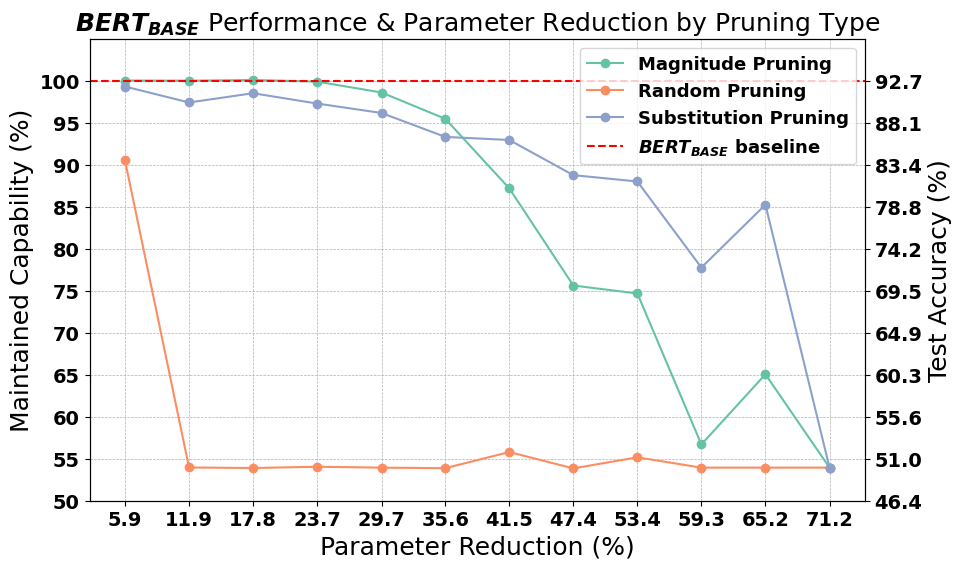

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Pruning data
pruning_data = {
    "Sparsity Level": [0.0593, 0.1186, 0.1779, 0.2373, 0.2969, 0.3559, 0.4152, 0.4745, 0.5338, 0.5931, 0.6524, 0.7118],
    "Magnitude": [0.9272, 0.9270, 0.9278, 0.9260, 0.9140, 0.8850, 0.8082, 0.7010, 0.6922, 0.5256, 0.6030, 0.5000],
    "Random": [0.8390, 0.5002, 0.4996, 0.5010, 0.5000, 0.4994, 0.5172, 0.4992, 0.5114, 0.5000, 0.5000, 0.5000],
    "Substitution": [0.9206, 0.9030, 0.9132, 0.9018, 0.8914, 0.8650, 0.8616, 0.8228, 0.8158, 0.7208, 0.7902, 0.5000]
}

# Convert to DataFrame
df_pruning = pd.DataFrame(pruning_data)
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Create the plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the data on the left y-axis (maintained capability)
for pruning_type in ["Magnitude", "Random", "Substitution"]:
    maintained_capability = df_pruning[pruning_type] / 0.927 * 100
    ax1.plot(df_pruning['Sparsity Level']*100, maintained_capability, label=f'{pruning_type} Pruning', marker='o', color=colors.pop(0))

# Plot the baseline at maintained capability = 100
ax1.axhline(y=100, color='red', linestyle='--', label='$BERT_{BASE}$ baseline')

# Set the x-axis ticks
sparsity_ticks = df_pruning['Sparsity Level']*100
ax1.set_xticks(sparsity_ticks)
ax1.set_xticklabels([f"{x:.1f}" for x in sparsity_ticks])

# Font size settings
plt.rcParams.update({'font.size': 14})
ax1.set_title('$BERT_{BASE}$ Performance & Parameter Reduction by Pruning Type', fontsize=18)
ax1.set_xlabel('Parameter Reduction (%)', fontsize=18)
ax1.set_ylabel('Maintained Capability (%)', fontsize=18)

# Configure the left y-axis
y_ticks = range(50, 105, 5)
ax1.set_yticks(y_ticks)
ax1.set_ylim(50, 105)
ax1.legend(fontsize=13, loc='upper right')
ax1.grid(True, which='both', linestyle='--', linewidth=0.5)

# Create the second y-axis
ax2 = ax1.twinx()

# Align the second y-axis to show the test accuracy
ax2.set_ylim(ax1.get_ylim())
ax2.set_yticks(y_ticks)
ax2.set_yticklabels([f"{y * 0.927:.1f}" for y in y_ticks])

# Set the second y-axis label
ax2.set_ylabel('Test Accuracy (%)', fontsize=18)

# Show the plot
plt.savefig('figures/pruning_acc_perf_comparison.png', bbox_inches='tight')


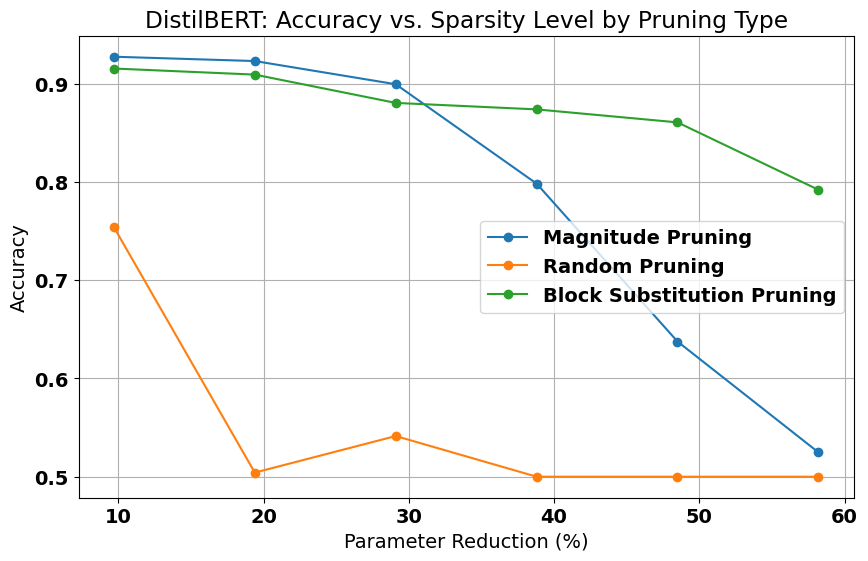

In [3]:
# DistilBERT

import pandas as pd
import matplotlib.pyplot as plt

# Update the data in the improved structure:
distilBERT_updated_data = {
    "Sparsity Level": [0.0970, 0.1940, 0.2910, 0.3880, 0.4849, 0.5819],
    "Magnitude": [0.9274, 0.9230, 0.8994, 0.7982, 0.6376, 0.5248],
    "Random": [0.7540, 0.5042, 0.5414, 0.5000, 0.5000, 0.5000],
    "Block Substitution": [0.9154, 0.9092, 0.8804, 0.8738, 0.8606, 0.7920]
}

# Convert to DataFrame
df_distilBERT_pruning = pd.DataFrame(distilBERT_updated_data)

# Plotting the new data
plt.figure(figsize=(10, 6))
for pruning_type in ["Magnitude", "Random", "Block Substitution"]:
    plt.plot(df_distilBERT_pruning['Sparsity Level']*100, df_distilBERT_pruning[pruning_type], label=f'{pruning_type} Pruning', marker='o')
plt.title('DistilBERT: Accuracy vs. Sparsity Level by Pruning Type')
plt.xlabel('Parameter Reduction (%)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


### MACs

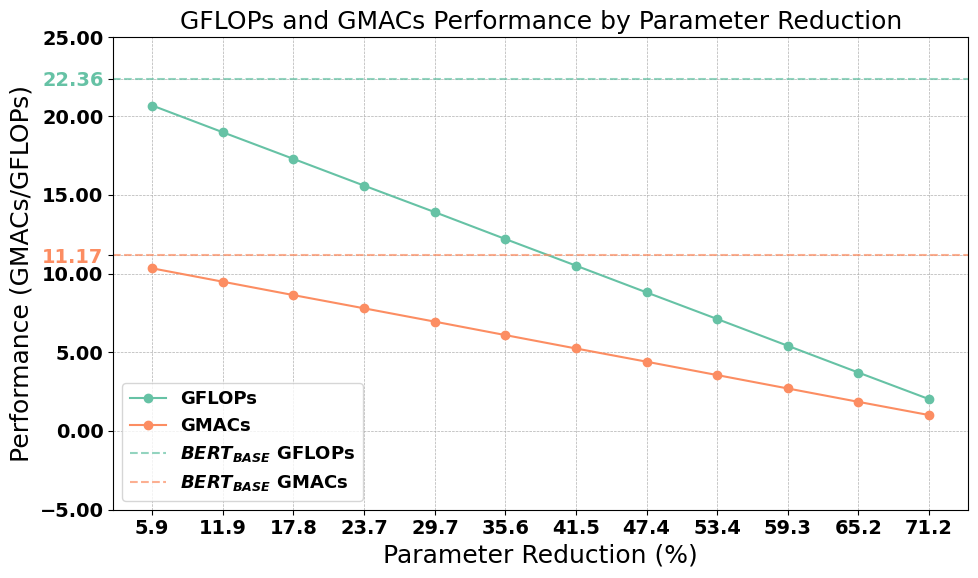

In [4]:
import matplotlib.pyplot as plt
# Data
metrics = [
    {"block": 5, "GFLOPs": 20.67, "GMACs": 10.33},
    {"block": 8, "GFLOPs": 18.97, "GMACs": 9.48},
    {"block": 0, "GFLOPs": 17.28, "GMACs": 8.63},
    {"block": 6, "GFLOPs": 15.58, "GMACs": 7.79},
    {"block": 11, "GFLOPs": 13.89, "GMACs": 6.94},
    {"block": 7, "GFLOPs": 12.19, "GMACs": 6.09},
    {"block": 3, "GFLOPs": 10.5, "GMACs": 5.24},
    {"block": 4, "GFLOPs": 8.8, "GMACs": 4.4},
    {"block": 10, "GFLOPs": 7.11, "GMACs": 3.55},
    {"block": 1, "GFLOPs": 5.41, "GMACs": 2.7},
    {"block": 2, "GFLOPs": 3.71, "GMACs": 1.85},
    {"block": 9, "GFLOPs": 2.02, "GMACs": 1.01}
]

BERT_baseline_gmacs = 11.17
BERT_baseline_gflops = 22.36

# Plotting without sorting by block and changing colors for better visual distinction
plt.figure(figsize=(10, 6))

colors = ['#66c2a5', '#fc8d62', '#8da0cb']
plt.plot(df_pruning['Sparsity Level']*100, [m["GFLOPs"] for m in metrics], marker='o', linestyle='-', label='GFLOPs', color=colors[0])
plt.plot(df_pruning['Sparsity Level']*100, [m["GMACs"] for m in metrics], marker='o', linestyle='-', label='GMACs', color=colors[1])
plt.axhline(y=BERT_baseline_gflops, color=colors[0], linestyle='--', label='$BERT_{BASE}$ GFLOPs', alpha=0.7)
plt.axhline(y=BERT_baseline_gmacs, color=colors[1], linestyle='--', label='$BERT_{BASE}$ GMACs', alpha=0.7)

sparsity_ticks = df_pruning['Sparsity Level']*100
plt.xticks(sparsity_ticks, labels=[f"{x:.1f}" for x in sparsity_ticks])

# Add two yticks for the two axhline
plt.yticks(list(plt.yticks()[0]) + [BERT_baseline_gflops, BERT_baseline_gmacs])
# Color the y ticks of the axhline only
plt.gca().get_yticklabels()[-2].set_color(colors[0])
plt.gca().get_yticklabels()[-1].set_color(colors[1])


# Font size settings
plt.rcParams.update({'font.size': 14})
plt.title('GFLOPs and GMACs Performance by Parameter Reduction', fontsize=18)
plt.xlabel('Parameter Reduction (%)', fontsize=18)
plt.ylabel('Performance (GMACs/GFLOPs)', fontsize=18)
plt.legend(fontsize=13)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

# Show the plot
plt.savefig('figures/gflops_gmacs.png', bbox_inches='tight')

In [5]:
distilBERT_baseline_gmacs = 5.59
distilBERT_baseline_gflops = 11.18

### Block importance plot

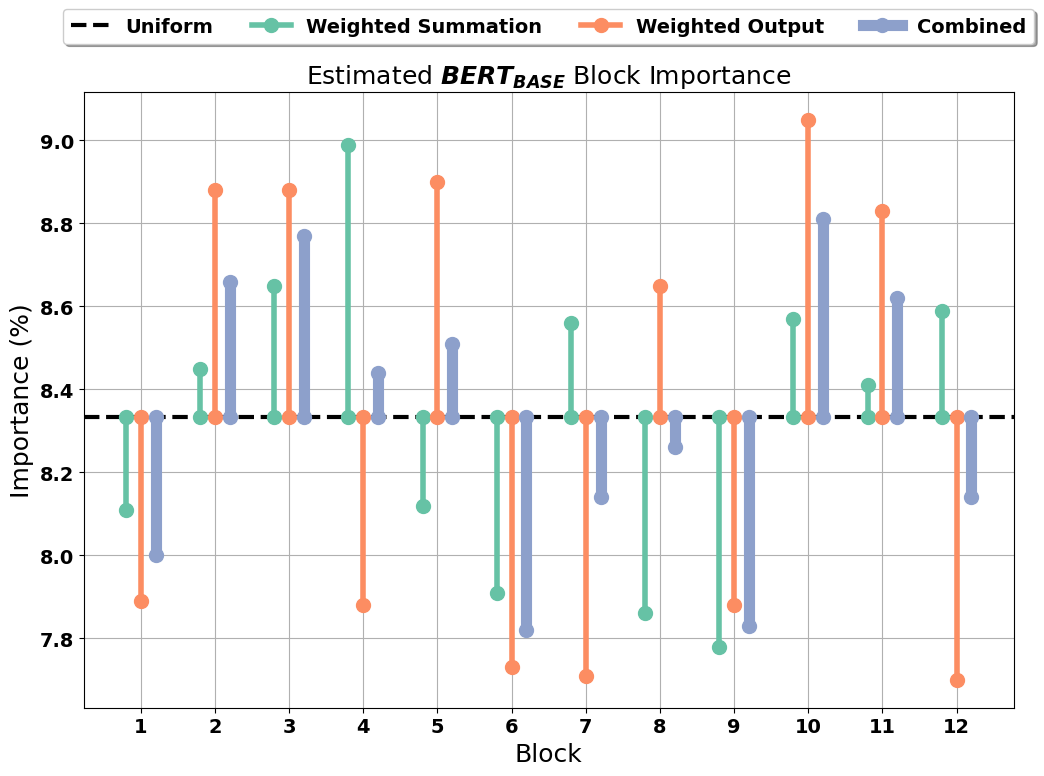

In [6]:
import matplotlib.pyplot as plt

# Data from tables
blocks = list(range(1, 13))

# Importance from approach 1
approach_1_importance = [8.11, 8.45, 8.65, 8.99, 8.12, 7.91, 8.56, 7.86, 7.78, 8.57, 8.41, 8.59]

# Importance from approach 2
approach_2_importance = [7.89, 8.88, 8.88, 7.88, 8.90, 7.73, 7.71, 8.65, 7.88, 9.05, 8.83, 7.70]

# Combined importance
combined_importance = [8.00, 8.66, 8.77, 8.44, 8.51, 7.82, 8.14, 8.26, 7.83, 8.81, 8.62, 8.14]

plt.figure(figsize=(12, 8))
# Uniform line
plt.axhline(y=1/12*100, color='black', linestyle='--', label='Uniform', linewidth=3)

# Small offset to separate lines for each approach
offsets = [-0.2, 0, 0.2]

colors = ['#66c2a5', '#fc8d62', '#8da0cb']
labels = ['Weighted Summation', 'Weighted Output', 'Combined']

for idx, values in enumerate([approach_1_importance, approach_2_importance, combined_importance]):
    line_width = 8 if labels[idx] == 'Combined' else 4  # Set line width for Combined importance
    for i in range(12):
        block_position = blocks[i] + offsets[idx]
        start = 1/12 * 100
        end = values[i]
        plt.plot([block_position] * 2, [start, end], marker='o', color=colors[idx], linewidth=line_width, markersize=10, label=labels[idx] if i == 0 else "")

plt.rcParams.update({'font.size': 14})
plt.title('Estimated $BERT_{BASE}$ Block Importance', fontsize=18)
plt.xlabel('Block', fontsize=18)
plt.ylabel('Importance (%)', fontsize=18)
plt.xticks(blocks)  # Ensure ticks for each block
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, fancybox=True, shadow=True)
plt.grid(True)

# Save to file
plt.savefig('figures/bert_encoder_block_importance.png', bbox_inches='tight')


### Plot $BERT_{base}$

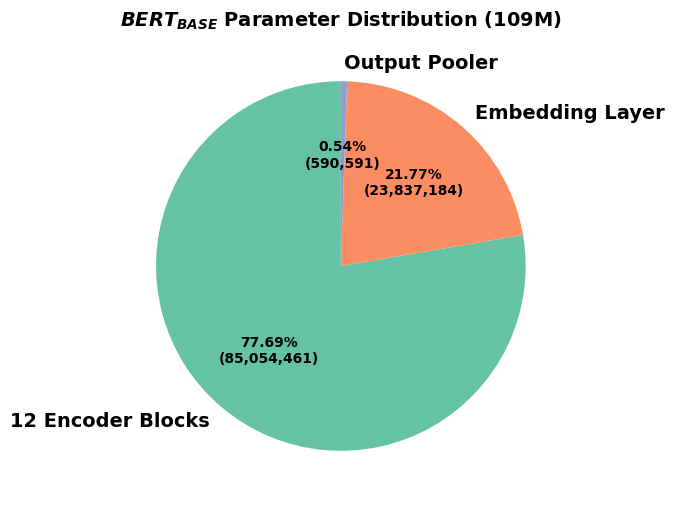

In [7]:
import matplotlib.pyplot as plt

labels = ['12 Encoder Blocks', 'Embedding Layer', 'Output Pooler']
parameters = [85054464, 23837184, 590592]

# Creating a prettier version of the pie chart with improved aesthetics
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Pie chart
wedges, texts, autotexts = ax.pie(parameters, labels=labels, autopct=lambda p: '{:.2f}%\n({:,})'.format(p, int(p/100.*sum(parameters))),
                                  startangle=90, colors=colors, textprops={'color':"black"})

# Improve the display of the autopct values
for text in autotexts:
    text.set_color('black')
    text.set_fontsize(10)
    text.set_weight('bold')

# Title and other settings
ax.set_title('$BERT_{BASE}$ Parameter Distribution (109M)', fontsize=14, fontweight='bold')

# Save to file
plt.savefig('figures/bert_parameters_pie_chart.png', bbox_inches='tight')

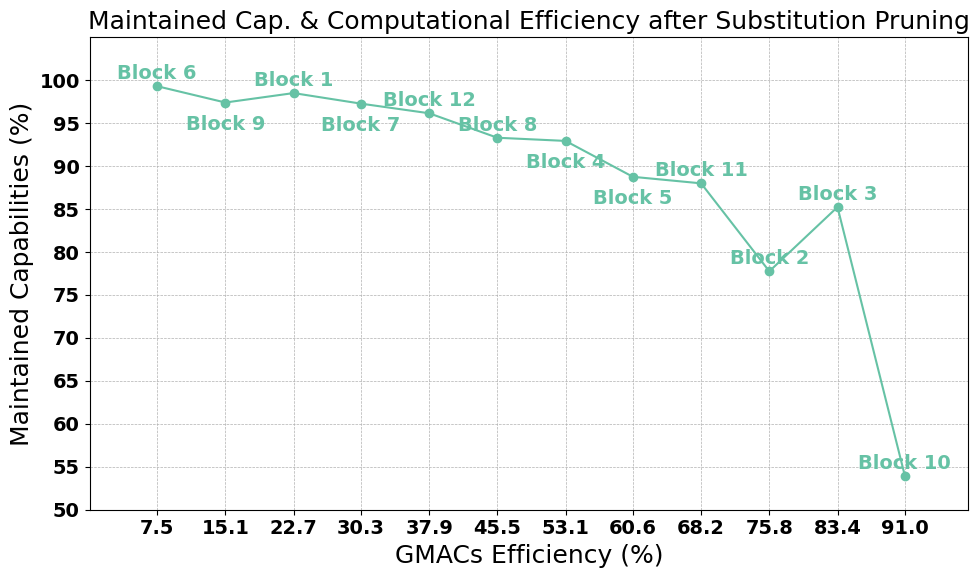

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

data = [
    {"block": 5, "GFLOPs": 20.67, "GMACs": 10.33, 'Reduction': 0.059313115775014635, 'Accuracy': 0.9206, 'Cap. Maintained': 99.31},
    {"block": 8, "GFLOPs": 18.97, "GMACs": 9.48, 'Reduction': 0.11862623155002927, 'Accuracy': 0.903, 'Cap. Maintained': 97.41},
    {"block": 0, "GFLOPs": 17.28, "GMACs": 8.63, 'Reduction': 0.1779393473250439, 'Accuracy': 0.9132, 'Cap. Maintained': 98.51},
    {"block": 6, "GFLOPs": 15.58, "GMACs": 7.79, 'Reduction': 0.23725246310005854, 'Accuracy': 0.9018, 'Cap. Maintained': 97.28},
    {"block": 11, "GFLOPs": 13.89, "GMACs": 6.94, 'Reduction': 0.2965655788750732, 'Accuracy': 0.8914, 'Cap. Maintained': 96.16},
    {"block": 7, "GFLOPs": 12.19, "GMACs": 6.09, 'Reduction': 0.3558786946500878, 'Accuracy': 0.865, 'Cap. Maintained': 93.31},
    {"block": 3, "GFLOPs": 10.5, "GMACs": 5.24, 'Reduction': 0.41519181042510245, 'Accuracy': 0.8616, 'Cap. Maintained': 92.94},
    {"block": 4, "GFLOPs": 8.8, "GMACs": 4.4, 'Reduction': 0.4745049262001171, 'Accuracy': 0.8228, 'Cap. Maintained': 88.76},
    {"block": 10, "GFLOPs": 7.11, "GMACs": 3.55, 'Reduction': 0.5338180419751317, 'Accuracy': 0.8158, 'Cap. Maintained': 88.00},
    {"block": 1, "GFLOPs": 5.41, "GMACs": 2.7, 'Reduction': 0.5931311577501464, 'Accuracy': 0.7208, 'Cap. Maintained': 77.76},
    {"block": 2, "GFLOPs": 3.71, "GMACs": 1.85, 'Reduction': 0.652444273525161, 'Accuracy': 0.7902, 'Cap. Maintained': 85.24},
    {"block": 9, "GFLOPs": 2.02, "GMACs": 1.01, 'Reduction': 0.7117573893001756, 'Accuracy': 0.5, 'Cap. Maintained': 53.94},
]


BERT_baseline_gmacs = 11.17
BERT_baseline_gflops = 22.36

df = pd.DataFrame(data)

# Calculate computational efficiency as block GFLOPs/BERT_baseline_gflops
df['GFLOPs_Efficiency'] = 1 - df['GFLOPs'] / BERT_baseline_gflops
df['GMACs_Efficiency'] = 1 - df['GMACs'] / BERT_baseline_gmacs


plt.figure(figsize=(10, 6))

efficiency_ticks = df['GMACs_Efficiency']*100
plt.xticks(efficiency_ticks, labels=[f"{x:.1f}" for x in efficiency_ticks])

# Function to annotate points dynamically
def annotate_df(dataframe, color, ticks):
    last_y = -1
    for i, row in dataframe.iterrows():
        y_pos = row['Cap. Maintained']
        # Adjust y position dynamically to prevent overlap
        if abs(y_pos - last_y) < 2: 
            y_pos -= 4
        plt.annotate(f"Block {int(row['block'])+1}", (ticks[i], y_pos), textcoords="offset points", xytext=(0,5), ha='center', color=color)    
        last_y = y_pos

# Annotate each DataFrame with a unique color and position
annotate_df(df, '#66c2a5', efficiency_ticks)


# Adjust the y-axis limits to make room for annotations at the top
plt.ylim(50, 105)
plt.xlim(0, 98)

# Plot accuracy versus computational efficiency as line chart
plt.rcParams.update({'font.size': 14})  # Adjusts the base default font size
plt.plot(efficiency_ticks, df['Cap. Maintained'], marker='o', label='Efficiency', color='#66c2a5')
plt.title('Maintained Cap. & Computational Efficiency after Substitution Pruning', fontsize=18)
plt.xlabel('GMACs Efficiency (%)', fontsize=18)
plt.ylabel('Maintained Capabilities (%)', fontsize=18)
# Add legend explaining that the numbers are blocks
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# y-ticks every 5
plt.yticks(range(50, 101, 5))
plt.tight_layout()

# Save to file
plt.savefig('figures/efficiency_over_accuracy.png', bbox_inches='tight')

### Main results

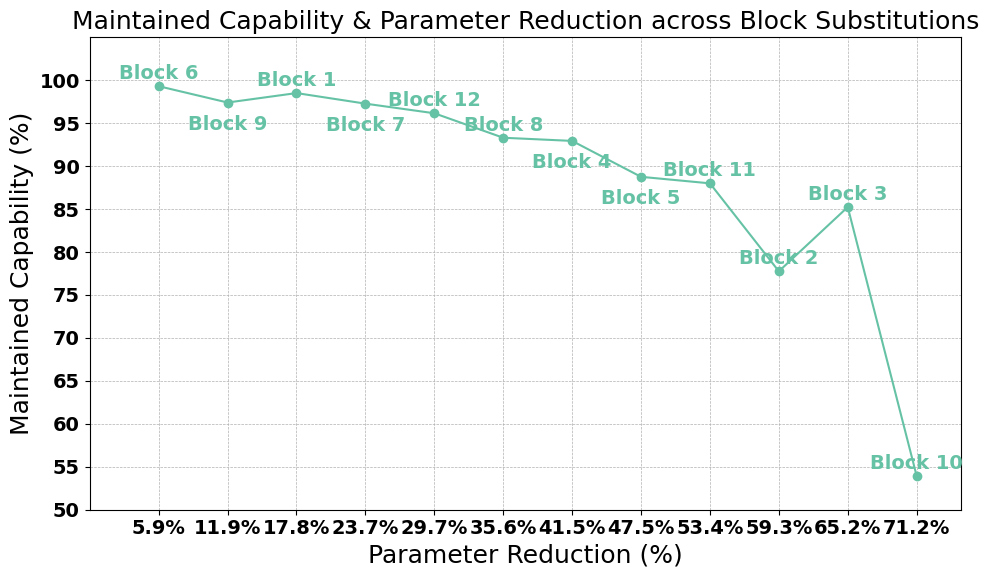

In [9]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming the DataFrame 'df' is already defined as per your input above.

plt.figure(figsize=(10, 6))

# Compute the ticks for the X-axis based on parameter reduction
reduction_ticks = df['Reduction'] * 100  # Convert reductions to percentage
plt.xticks(reduction_ticks, labels=[f"{x:.1f}%" for x in reduction_ticks])

# Set font size globally for easier reading
plt.rcParams.update({'font.size': 14})


# Annotate each DataFrame with a unique color and position
annotate_df(df, '#66c2a5', reduction_ticks)

# Plot Capability Maintained versus Reduction as line chart
plt.plot(reduction_ticks, df['Cap. Maintained'], marker='o', linestyle='-', color='#66c2a5', label='Capability Maintained')

# Setting up the title and labels with font size adjustments
plt.title('Maintained Capability & Parameter Reduction across Block Substitutions', fontsize=18)
plt.xlabel('Parameter Reduction (%)', fontsize=18)
plt.ylabel('Maintained Capability (%)', fontsize=18)

plt.ylim(50, 105)
plt.xlim(0, 75)

# Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# y-ticks every 5
plt.yticks(range(50, 101, 5))

# Tight layout to ensure no clipping of tick-labels or titles
plt.tight_layout()

# Save to file (uncomment the next line to save the plot)
plt.savefig('figures/main_results.png', bbox_inches='tight')




### Inverse importance sequence

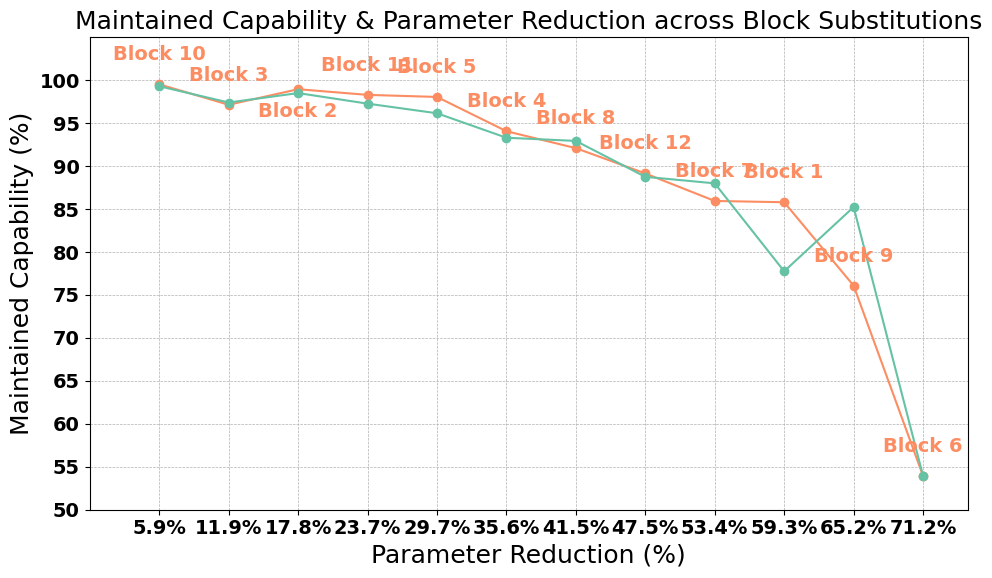

In [10]:
import matplotlib.pyplot as plt
import pandas as pd



data = [    
    {"block": 9, "Reduction": 0.059313115775014635, "Test Accuracy": 92.26, 'Cap. Maintained': 99.53},
    {"block": 2, "Reduction": 0.11862623155002927, "Test Accuracy": 90.06, 'Cap. Maintained': 97.15},
    {"block": 1, "Reduction": 0.1779393473250439, "Test Accuracy": 91.74, 'Cap. Maintained': 98.96},
    {"block": 10, "Reduction": 0.23725246310005854, "Test Accuracy": 91.12, 'Cap. Maintained': 98.30},
    {"block": 4, "Reduction": 0.2965655788750732, "Test Accuracy": 90.90, 'Cap. Maintained': 98.06},
    {"block": 3, "Reduction": 0.3558786946500878, "Test Accuracy": 87.20, 'Cap. Maintained': 94.07},
    {"block": 7, "Reduction": 0.41519181042510245, "Test Accuracy": 85.38, 'Cap. Maintained': 92.10},
    {"block": 11, "Reduction": 0.4745049262001171, "Test Accuracy": 82.64, 'Cap. Maintained': 89.15},
    {"block": 6, "Reduction": 0.5338180419751317, "Test Accuracy": 79.68, 'Cap. Maintained': 85.95},
    {"block": 0, "Reduction": 0.5931311577501464, "Test Accuracy": 79.54, 'Cap. Maintained': 85.80},
    {"block": 8, "Reduction": 0.652444273525161, "Test Accuracy": 70.54, 'Cap. Maintained': 76.09},
    {"block": 5, "Reduction": 0.7117573893001756, "Test Accuracy": 50.00, 'Cap. Maintained': 53.94}
]

inverse_df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))

# Compute the ticks for the X-axis based on parameter reduction
reduction_ticks = inverse_df['Reduction'] * 100  # Convert reductions to percentage
plt.xticks(reduction_ticks, labels=[f"{x:.1f}%" for x in reduction_ticks])

# Set font size globally for easier reading
plt.rcParams.update({'font.size': 14})

# Plot Capability Maintained versus Reduction for both dataframes
plt.plot(reduction_ticks, inverse_df['Cap. Maintained'], marker='o', linestyle='-', color='#fc8d62', label='Inverse Sequence Capability Maintained')
plt.plot(reduction_ticks, df['Cap. Maintained'], marker='o', linestyle='-', color='#66c2a5', label='Original Sequence Capability Maintained')

def annotate_df(dataframe, color, ticks):
    last_y = -1
    for i, row in dataframe.iterrows():
        y_pos = row['Cap. Maintained']
        # Adjust y position dynamically to prevent overlap
        if abs(y_pos - last_y) < 2: 
            y_pos -= 4
        else:
            y_pos += 2
        plt.annotate(f"Block {int(row['block'])+1}", (ticks[i], y_pos), textcoords="offset points", xytext=(0,5), ha='center', color=color)    
        last_y = y_pos

# Annotate each DataFrame with a unique color and position
annotate_df(inverse_df, '#fc8d62', reduction_ticks)

# Setting up the title and labels with font size adjustments
plt.title('Maintained Capability & Parameter Reduction across Block Substitutions', fontsize=18)
plt.xlabel('Parameter Reduction (%)', fontsize=18)
plt.ylabel('Maintained Capability (%)', fontsize=18)

# Adjust the y-axis limits to make room for annotations at the top
plt.ylim(50, 105)
plt.xlim(0, 75)

# Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# y-ticks every 5
plt.yticks(range(50, 101, 5))  # Extend to 105 to match the ylim

# Tight layout to ensure no clipping of tick-labels or titles
plt.tight_layout()

# Save to file
plt.savefig('figures/inverse_importance_sequence_results.png', bbox_inches='tight')

# Show the plot
plt.show()

### Random sequences

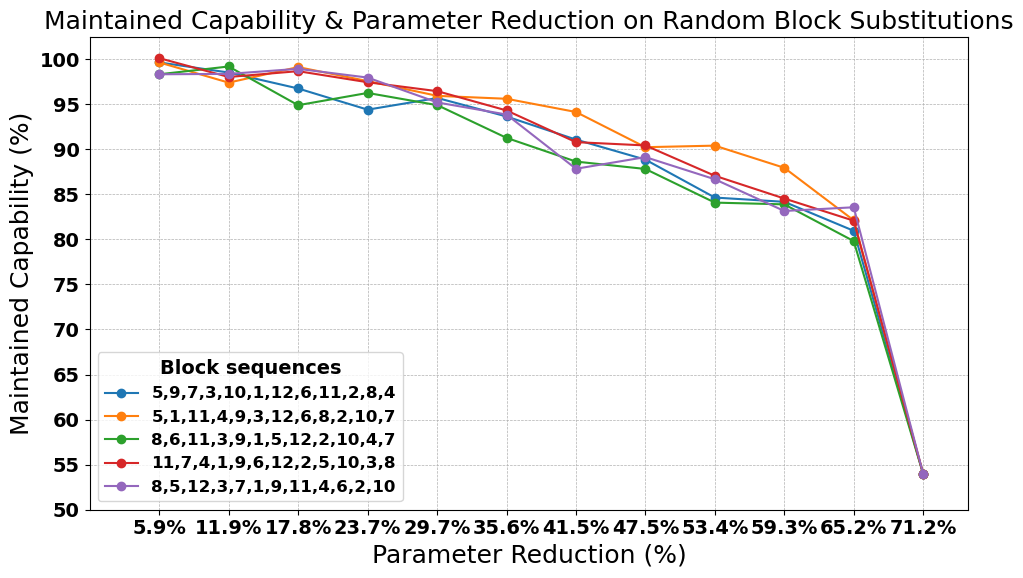

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

data = [    
    {"sequence": "5,9,7,3,10,1,12,6,11,2,8,4", "Test Accuracy": [0.9236,0.9132,0.8968,0.875,0.887,0.868,0.8442,0.8236,0.7846,0.7802,0.7504,0.5]},
    {"sequence": "5,1,11,4,9,3,12,6,8,2,10,7", "Test Accuracy": [0.9236,0.9028,0.9188,0.9044,0.8892,0.8862,0.8726,0.8364,0.838,0.8152,0.7612,0.5]},
    {"sequence": "8,6,11,3,9,1,5,12,2,10,4,7", "Test Accuracy": [0.9114,0.9194,0.8796,0.8922,0.8796,0.846,0.8216,0.814,0.7794,0.7776,0.7398,0.5]},
    {"sequence": "11,7,4,1,9,6,12,2,5,10,3,8", "Test Accuracy": [0.928,0.9086,0.9146,0.9032,0.894,0.8742,0.8416,0.8382,0.807,0.7836,0.7608,0.5]},
    {"sequence": "8,5,12,3,7,1,9,11,4,6,2,10", "Test Accuracy": [0.9114,0.9118,0.917,0.908,0.8824,0.87,0.8142, 0.8262,0.8034,0.7708,0.7746,0.5]},
]

df = pd.DataFrame(data)

# Compute a new column "Cap. Maintained" as a list for test accuracy/92.70
cap_maintained = []
for i, row in df.iterrows():
    cap_maintained.append([100 * acc / 0.927 for acc in row['Test Accuracy']])
df['Cap. Maintained'] = cap_maintained

plt.figure(figsize=(10, 6))

# Set font size globally for easier reading
plt.rcParams.update({'font.size': 14})

# Compute the ticks for the X-axis based on parameter reduction
reduction_ticks = [5.93, 11.86, 17.79, 23.73, 29.69, 35.59, 41.52, 47.45, 53.38, 59.31, 65.24, 71.18]
plt.xticks(reduction_ticks, labels=[f"{x:.1f}%" for x in reduction_ticks])

# Plot Capability Maintained versus Reduction for both dataframes
# plt.plot(reduction_ticks, inverse_df['Cap. Maintained'], marker='o', linestyle='-', color='#fc8d62', label='Inverse Sequence Capability Maintained')

# Plot df
for i, row in df.iterrows():
    plt.plot(reduction_ticks, row['Cap. Maintained'], marker='o', label=row['sequence'], linestyle='-')

# Setting up the title and labels with font size adjustments
plt.title('Maintained Capability & Parameter Reduction on Random Block Substitutions', fontsize=18)
plt.xlabel('Parameter Reduction (%)', fontsize=18)
plt.ylabel('Maintained Capability (%)', fontsize=18)
# Legend
plt.legend(loc='lower left', fontsize=12, title="Block sequences")

# Adding a grid for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# y-ticks every 5
plt.yticks(range(50, 101, 5))  # Extend to 105 to match the ylim
plt.xlim(0, 75)

# Tight layout to ensure no clipping of tick-labels or titles
plt.tight_layout()

# Save to file
plt.savefig('figures/random_block_sequence.png', bbox_inches='tight')

### Gradient block sensitivity

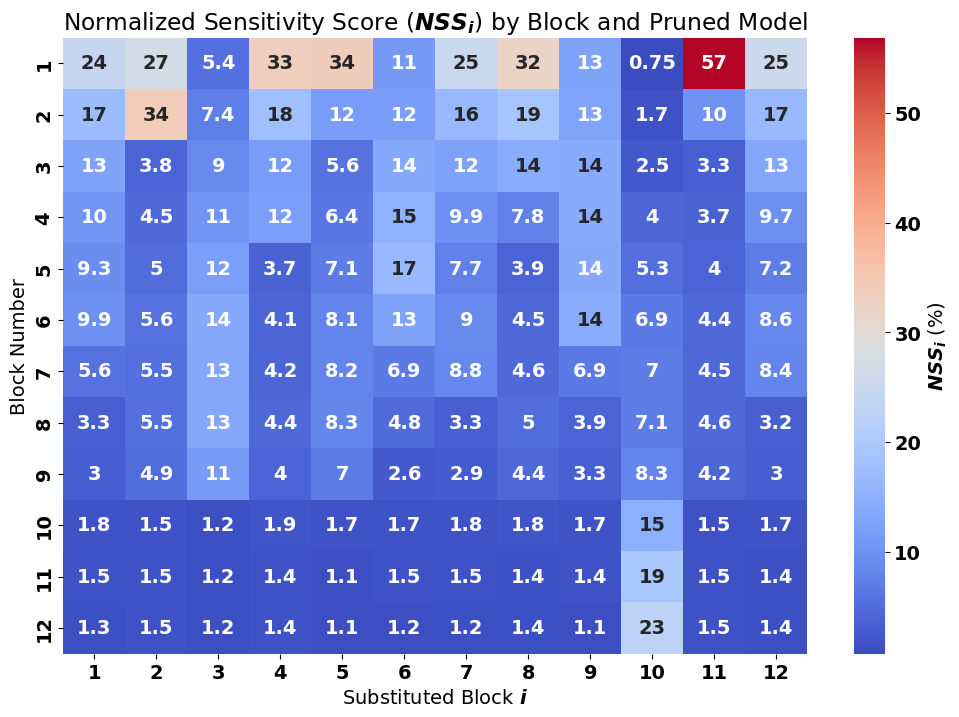

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the data array from the provided normalized softmax scores for each model
data = [
 {'block': 0,'softmax_normalized_sensitivity': [0.2400, 0.1702, 0.1261, 0.1059, 0.0952, 0.0984, 0.0567, 0.0331, 0.0291, 0.0175, 0.0151, 0.0127]},
 {'block': 1, 'softmax_normalized_sensitivity': [0.2720, 0.3364, 0.0384, 0.0448, 0.0495, 0.0558, 0.0550, 0.0547, 0.0486, 0.0149, 0.0150, 0.0149]},
 {'block': 2, 'softmax_normalized_sensitivity': [0.0544, 0.0749, 0.0911, 0.1064, 0.1201, 0.1386, 0.1339, 0.1325, 0.1114, 0.0121, 0.0123, 0.0123]},
 {'block': 3, 'softmax_normalized_sensitivity': [0.3322, 0.1788, 0.1182, 0.1191, 0.0370, 0.0414, 0.0422, 0.0442, 0.0395, 0.0189, 0.0143, 0.0143]},
 {'block': 4, 'softmax_normalized_sensitivity': [0.3403, 0.1201, 0.0572, 0.0646, 0.0704, 0.0805, 0.0802, 0.0811, 0.0667, 0.0163, 0.0113, 0.0113]},
 {'block': 5, 'softmax_normalized_sensitivity': [0.1114, 0.1191, 0.1395, 0.1558, 0.1712, 0.1191, 0.0670, 0.0475, 0.0257, 0.0174, 0.0145, 0.0118]},
 {'block': 6, 'softmax_normalized_sensitivity': [0.2492, 0.1663, 0.1248, 0.0992, 0.0776, 0.0898, 0.0869, 0.0326, 0.0289, 0.0174, 0.0149, 0.0125]},
 {'block': 7, 'softmax_normalized_sensitivity': [0.3227, 0.1911, 0.1406, 0.0782, 0.0391, 0.0445, 0.0458, 0.0490, 0.0430, 0.0185, 0.0136, 0.0136]},
 {'block': 8, 'softmax_normalized_sensitivity': [0.1273, 0.1292, 0.1409, 0.1408, 0.1386, 0.1407, 0.0691, 0.0386, 0.0319, 0.0171, 0.0143, 0.0115]},
 {'block': 9, 'softmax_normalized_sensitivity': [0.0075, 0.0166, 0.0247, 0.0405, 0.0535, 0.0687, 0.0702, 0.0710, 0.0828, 0.1464, 0.1920, 0.2261]},
 {'block': 10, 'softmax_normalized_sensitivity': [0.5685, 0.1032, 0.0329, 0.0368, 0.0398, 0.0441, 0.0444, 0.0452, 0.0411, 0.0146, 0.0147, 0.0147]},
 {'block': 11, 'softmax_normalized_sensitivity': [0.2561, 0.1664, 0.1324, 0.0979, 0.0730, 0.0855, 0.0826, 0.0320, 0.0291, 0.0174, 0.0137, 0.0138]}
]


# Flatten the data for easier manipulation
flattened_data = []
for item in data:
    block_id = item['block']
    sensitivities = item['softmax_normalized_sensitivity']
    for model_id, sensitivity in enumerate(sensitivities, 1):
        flattened_data.append((block_id+1, model_id, sensitivity*100))

# Create a DataFrame
df = pd.DataFrame(flattened_data, columns=['Block', 'Model', 'Sensitivity'])

# Pivot the DataFrame to format suitable for a heatmap
pivot_table = df.pivot(index='Model', columns='Block', values='Sensitivity')

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", cbar_kws={'label': '$NSS_i$ (%)'})
plt.title('Normalized Sensitivity Score ($NSS_i$) by Block and Pruned Model')
plt.xlabel('Substituted Block $i$')
plt.ylabel('Block Number')
plt.show()

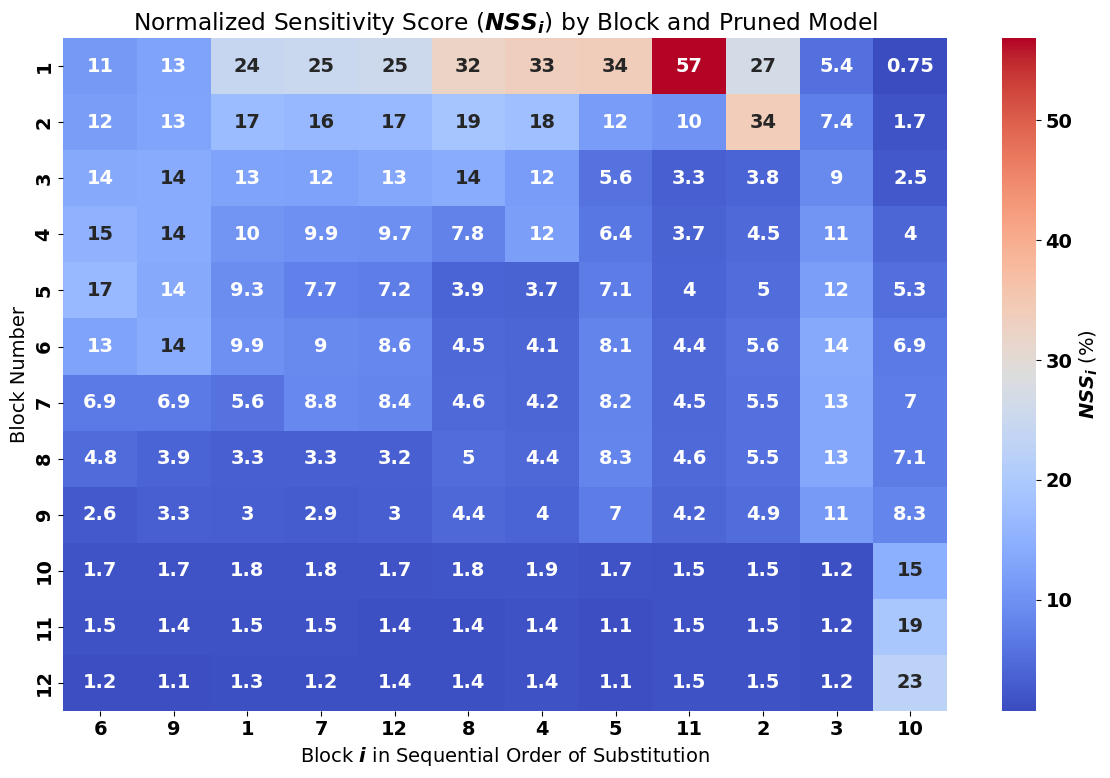

In [13]:
# With x axis sorted by pruning order
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Flatten the data for easier manipulation
flattened_data = []
for item in data:
    block_id = item['block']
    sensitivities = item['softmax_normalized_sensitivity']
    for model_id, sensitivity in enumerate(sensitivities, 1):
        flattened_data.append((block_id+1, model_id, sensitivity*100))

# Create a DataFrame
df = pd.DataFrame(flattened_data, columns=['Block', 'Model', 'Sensitivity'])

# Pivot the DataFrame to format suitable for a heatmap
pivot_table = df.pivot(index='Model', columns='Block', values='Sensitivity')

# Reorder columns based on the specified sequence
correct_order = [6, 9, 1, 7, 12, 8, 4, 5, 11, 2, 3, 10] 
pivot_table = pivot_table[correct_order]

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", cbar_kws={'label': '$NSS_i$ (%)'})
plt.title('Normalized Sensitivity Score ($NSS_i$) by Block and Pruned Model')
plt.xlabel('Block $i$ in Sequential Order of Substitution')
plt.ylabel('Block Number')

plt.tight_layout()
plt.savefig('figures/sensitivity_scores_of_all_12_models.png', bbox_inches='tight')


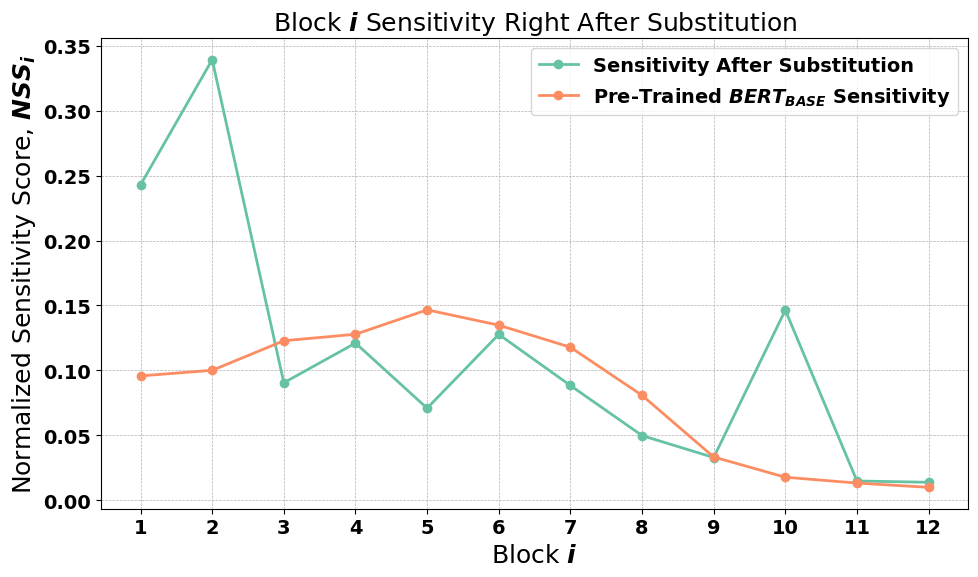

In [14]:
import matplotlib.pyplot as plt
import numpy as np

diagonals = [d['softmax_normalized_sensitivity'][i] for i, d in enumerate(data)]

# Create a figure and plot
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#66c2a5', '#fc8d62']

# Adjust the plots()
ax.plot(np.arange(1, len(diagonals)+1), diagonals, marker='o', linestyle='-', label='Sensitivity After Substitution', linewidth=2, color=colors[0])
pretrained_model_sensitivity = [0.0957, 0.1000, 0.1228, 0.1278, 0.1466, 0.1348, 0.1178, 0.0807, 0.0332, 0.0176, 0.0131, 0.0098]
ax.plot(np.arange(1, len(pretrained_model_sensitivity)+1), pretrained_model_sensitivity, marker='o', linestyle='-', label='Pre-Trained $BERT_{BASE}$ Sensitivity', linewidth=2, color=colors[1])

# Enhancing the plot details
ax.set_title('Block $i$ Sensitivity Right After Substitution', fontsize=18)
ax.set_xlabel('Block $i$', fontsize=18)
ax.set_ylabel('Normalized Sensitivity Score, $NSS_i$', fontsize=18)
ax.set_xticks(np.arange(1, len(pretrained_model_sensitivity)+1))
ax.set_xticklabels([str(i) for i in range(1, len(pretrained_model_sensitivity)+1)])

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend()

plt.tight_layout()

# Save to file
plt.savefig('figures/unordered_softmax_normalized_sensitivity_line_chart.png', bbox_inches='tight')



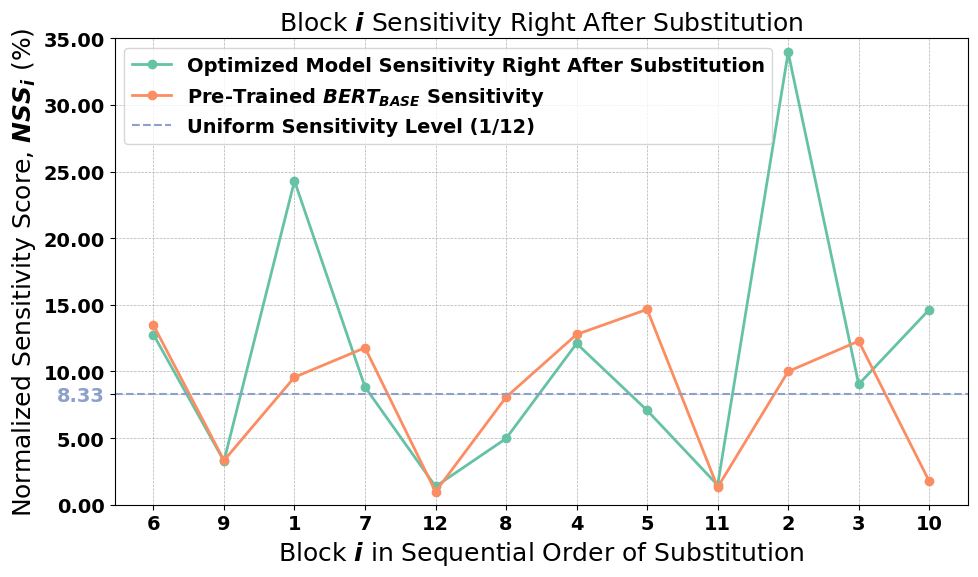

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# Assumed 'data' and 'diagonals' calculation based on your environment
# You should replace it with actual computation if different
diagonals = [d['softmax_normalized_sensitivity'][i] for i, d in enumerate(data)]

# The correct order specified
correct_order = [6, 9, 1, 7, 12, 8, 4, 5, 11, 2, 3, 10]

# Subtract 1 from correct_order for zero-based indexing
reordered_diagonals = [diagonals[i-1]*100 for i in correct_order]
reordered_pretrained_model_sensitivity = [pretrained_model_sensitivity[i-1]*100 for i in correct_order]

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 6))
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Using np.arange to generate positions for plotting
positions = np.arange(len(correct_order))

# Plot with positions as x-values
ax.plot(positions, reordered_diagonals, marker='o', linestyle='-', color=colors[0], linewidth=2, label='Optimized Model Sensitivity Right After Substitution')
ax.plot(positions, reordered_pretrained_model_sensitivity, marker='o', linestyle='-', color=colors[1], linewidth=2, label='Pre-Trained $BERT_{BASE}$ Sensitivity')

# Setting title and labels
ax.set_title('Block $i$ Sensitivity Right After Substitution', fontsize=18)
ax.set_xlabel('Block $i$ in Sequential Order of Substitution', fontsize=18)
ax.set_ylabel('Normalized Sensitivity Score, $NSS_i$ (%)', fontsize=18)

# Set custom x-ticks and labels
ax.set_xticks(positions)
ax.set_xticklabels([str(i) for i in correct_order])

plt.ylim(0, 35)

# Add uniform line
plt.axhline(y=1/len(data)*100, color=colors[2], linestyle='--', label='Uniform Sensitivity Level (1/12)', alpha=1)
# Add two yticks for the two axhline
plt.yticks(list(plt.yticks()[0]) + [1/len(data)*100])
# Color the uniform tick only
plt.gca().get_yticklabels()[-1].set_color(colors[2])

plt.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.legend()

plt.tight_layout()
plt.savefig('figures/ordered_softmax_normalized_sensitivity_line_chart.png', bbox_inches='tight')
plt.show()


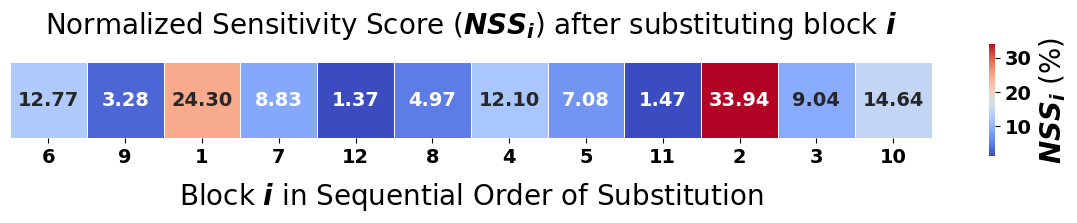

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Assuming reordered_diagonals and correct_order are defined as in your script

# Convert the reordered_diagonals into a 2D array as seaborn heatmap requires a 2D input
data = np.array(reordered_diagonals).reshape(1, -1)

# Define the labels for the x-axis based on your correct_order
labels = [str(i) for i in correct_order]

# Create a heatmap
plt.figure(figsize=(12, 2))  # Adjust the figure size as needed
cbar_kws=dict(label='$NSS_i$ (%)')
ax = sns.heatmap(data, annot=True, cmap="coolwarm", cbar=True, fmt=".2f",
                 xticklabels=labels, yticklabels=False, linewidths=0.5, cbar_kws=cbar_kws)


ax.figure.axes[-1].yaxis.label.set_size(20)


# Set aspect of the plot to be 'equal' to ensure the blocks are square
ax.set_aspect("equal")

# Configuring the aesthetics of the plot
plt.rcParams.update({'font.size': 16, 'font.weight': 'bold'})  # Adjusts the base default font size
plt.xticks(rotation=0)  # Keeps the labels horizontal
# Configuring title and labels with added padding
plt.title('Normalized Sensitivity Score ($NSS_i$) after substituting block $i$', fontsize=20, pad=20)
plt.xlabel('Block $i$ in Sequential Order of Substitution', fontsize=20, labelpad=10)
# Further adjust subplots if needed to add more space
plt.subplots_adjust(top=0.85)
plt.tight_layout()  # Adjusts plot to minimize overlap and ensure everything fits

plt.savefig('figures/sensitivity_heatmap.png', bbox_inches='tight')
plt.show()
